# Binomial model

In [99]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Exercise 1 - Modeling prior predictive distribution

In [100]:
gen_quant = CmdStanModel(stan_file='Lab3_ex1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


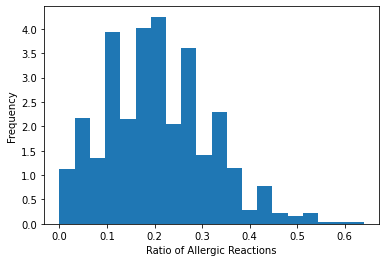

0.2048466257668712


In [101]:
# Generate 1000 samples (pair of p an y)
samples = gen_quant.sample(fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

# Get the generated quantities data as a pandas DataFrame
df = samples.draws_pd()

# Compute ratio of allergic reactions for each sample 
ratios =df['y'] / df['N']

# Create a histogram
plt.hist(ratios, bins = 'auto', density = True)
plt.xlabel('Ratio of Allergic Reactions')
plt.ylabel('Frequency')
plt.show()

print(ratios.mean())
# 7. After verification mean of the ratio is consistent with prior knowledge and amounts to ~0.2

## Exercise 2 - Modeling posterior and posterior predictive distribution

In [102]:
gen_quant = CmdStanModel(stan_file='Lab3_ex2.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,p,y_pred
0,0.0,0.0,0.368371,26.0
1,0.0,0.0,0.368371,19.0
2,0.0,0.0,0.368371,20.0
3,0.0,0.0,0.368371,21.0
4,0.0,0.0,0.368371,17.0
...,...,...,...,...
995,0.0,0.0,0.368371,19.0
996,0.0,0.0,0.368371,19.0
997,0.0,0.0,0.368371,16.0
998,0.0,0.0,0.368371,24.0


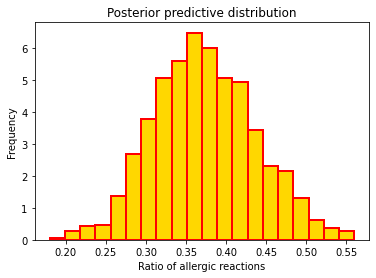

Expected value of ratio: 0.37382
94% density interval of the predicted ratio: [0.26 0.5 ]
Expected value of parameter p: 0.3683709999999999
94% density interval of parameter p: [0.368371 0.368371]
Number of simulated ratios that are smaller the average probability from traditional vaccines: 0.001
Probability that ratio is lower than the average probability from traditional vaccines:  1e-06


In [107]:
## Generate default samples (pair of p an y)
samples = gen_quant.sample(data={'N':50, 'y': 7}, 
                            fixed_param=True,  
                            iter_warmup=0, 
                            chains = 1)
N = 50
## Compute ratio of predicted allergic reactions for each sample and create a histogram:
df = samples.draws_pd()
display(df)
y_pred_ratio = df['y_pred'] / N
parameter_p = df['p']

plt.hist(y_pred_ratio, bins= 'auto', density=True, color = 'gold', edgecolor='red',linewidth=2)
plt.title('Posterior predictive distribution')
plt.xlabel('Ratio of allergic reactions')
plt.ylabel('Frequency')
plt.show()

## Compute the expected value and 94% density interval of the predicted ratio,
expected_ratio = y_pred_ratio.mean()
interval = az.hdi(y_pred_ratio.to_numpy(), credible_interval=0.94)
print('Expected value of ratio:', expected_ratio)
print('94% density interval of the predicted ratio:', interval)

## Compute expected value and 94% density interval of parameter p:
expected_value_p = parameter_p.mean()
interval_p = az.hdi(parameter_p.to_numpy(), credible_interval=0.94)
print('Expected value of parameter p:', expected_value_p)
print('94% density interval of parameter p:', interval_p)

# count the number of simulated ratios that are smaller

avg_prob = 0.2  # average probability from traditional vaccines
count = (y_pred_ratio < avg_prob).mean() 
print('Number of simulated ratios that are smaller the average probability from traditional vaccines:', count)

# Compute the probability that ratio is lower than the average probability
probability = count / len(y_pred_ratio)
print('Probability that ratio is lower than the average probability from traditional vaccines: ', probability)

# This proportion represents the estimated probability that the ratio of predicted allergic reactions for the new vaccine
# is lower than the average probability from traditional vaccines.